## Predicting the Fantasy Points scored based on Usage

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [149]:
df = pd.read_excel('2019_ff.xlsx')

In [150]:
#cleaning the dataframe

df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [151]:
df = df.iloc[: , 1:]

In [152]:
df.head()

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
1,Christian McCaffrey,CAR,RB,23,16,16,0,2,0,0,...,0,0,0,2,1387,15,287,1005,4,469.2
2,Lamar Jackson,BAL,QB,22,15,15,265,401,3127,6,...,2,3127,36,401,1206,7,176,0,0,415.68
3,Derrick Henry,TEN,RB,25,15,15,0,0,0,0,...,3,0,0,0,1540,16,303,206,2,294.6
4,Aaron Jones,GNB,RB,25,16,16,0,0,0,0,...,2,0,0,0,1084,16,236,474,3,314.8
5,Ezekiel Elliott,DAL,RB,24,16,16,0,0,0,0,...,2,0,0,0,1357,12,301,420,2,311.7


In [153]:
#df.drop(['Age', 'Tm', 'G', 'GS', 'Fumbles', 'FumblesLost'], axis=1, inplace=True)

In [154]:
#Organizing the players into dataframes based on position

rb_df = df[df['Pos'] == 'RB']
qb_df = df[df['Pos'] == 'QB']
wr_df = df[df['Pos'] == 'WR']
te_df = df[df['Pos'] == 'TE']

In [163]:
rushing  = ['RushingAtt', 'RushingYds', 'Y/R', 'RushingTD']
receiving  = ['Tgt', 'Rec', 'ReceivingYds', 'Y/R', 'ReceivingTD']
passing = ['PassingTD', 'PassingAtt', 'PassingYds']

#create a function to give each position dataframe the correct columns.  We will be using running backs as they hold the most value in Fantasy Football.
def transform_columns(df, new_column_list):
    df = df[['Player','Tm', 'Age', 'G','FantasyPoints'] + new_column_list + ['FumblesLost']]
    return df
rb_df = transform_columns(rb_df, rushing +receiving)

rb_df['FantasyPoints'] = (rb_df['RushingYds']*0.1 + rb_df['RushingTD']*6+ rb_df['ReceivingYds']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FumblesLost']*2)
rb_df['Total Usage'] = (rb_df['RushingAtt'] + rb_df['Tgt'])

In [166]:
x = rb_df['Total Usage'].values.reshape(-1, 1)
y = rb_df['FantasyPoints'].values.reshape(-1, 1)

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [168]:
regr = LinearRegression()
regr.fit(x_train, y_train)
yhat = regr.predict(x_test)

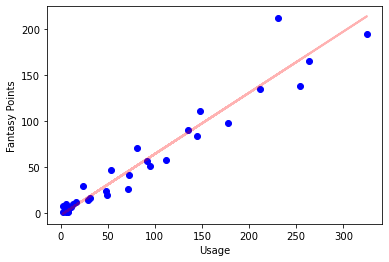

In [173]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, yhat, color='red', linewidth=2, alpha=0.3)
plt.xlabel('Usage')
plt.ylabel('Fantasy Points')
plt.show()


The line of best fit shows the predicted trend: How much the player is predicted to score based on usage. 